In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# Reading E-Commerce Data
cust = pd.read_csv("C:/Users/IBM_ADMIN/Desktop/Data Science/E commerce classification models/My Folder/E-Commerce.csv")

# Display Total number of rows and columns
cust.shape

In [ ]:
# Check the missing values of the dataset columnwise
cust.isnull().sum()


In [5]:
# Filling the missing values with forward or backward cells value
cust = cust.fillna(method = 'pad')

cust.isnull().sum()
cust.columns

Index(['Gender', 'Marital status', 'age group', 'Educatuon', 'income', 'Job',
       'Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14',
       'FACT__1', 'FACT__2', 'FACT__3', 'FACT__4', 'FACT__5', 'FACT__6',
       'FACT__7', 'FACT__8', 'FACT__9', 'FACT__10', 'FACT__11', 'FACT__12',
       'FACT__13', 'FACT__14', 'FACT__15', 'FACT__16', 'FACT__17', 'FACT__18',
       'FACT__19', 'FACT__20', 'FACT__21', 'FACT__22', 'FACT__23', 'FACT__24',
       'FACT__25', 'FACT__26', 'FACT__27', 'FACT__28', 'FACT__29', 'FACT__30'],
      dtype='object')

In [6]:
#To convert data to factors
from sklearn.preprocessing import LabelEncoder
count = cust.shape
lb_make = LabelEncoder()

# To convert the dataset variables into factors
for i in range(0, count[1]):
    cust[cust.columns[i]] = lb_make.fit_transform(cust[cust.columns[i]])

#To check the dataset
cust.head()

,Gender,Marital status,age group,Educatuon,income,Job,Area,CBB_9,CBB_10,CBB_11,...,FACT__21,FACT__22,FACT__23,FACT__24,FACT__25,FACT__26,FACT__27,FACT__28,FACT__29,FACT__30
0,0,1,1,0,0,3,2,1,2,0,...,2,3,3,3,2,3,2,3,3,3
1,0,1,2,0,0,3,3,1,2,1,...,3,0,3,0,2,0,2,0,3,0
2,0,1,2,1,0,3,3,4,1,0,...,2,2,2,2,1,3,2,3,0,2
3,0,1,2,1,0,0,3,4,1,0,...,2,3,2,2,1,2,2,2,2,2
4,0,1,2,1,0,0,3,1,2,1,...,3,0,3,3,2,3,2,3,3,3


In [7]:
# Reliability of the data
itemscores = cust
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)
 
    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))


cronbachalpha = CronbachAlpha(itemscores)
print("cronbachalpha value :", cronbachalpha)

cronbachalpha value : 0.9964667626569322


In [8]:
# Data Quality and sample validity(KMO and Bartlett's Test)
#from factor_analyzer import factor_analyzer.factor_analyzer
#factor_analyzer.factor_analyzer.calculate_kmo(data)

In [9]:
# Copying the factor variables data into one dataset
factor = cust.drop(['Gender', 'Marital status', 'age group', 'Educatuon', 'income', 'Job', 'Area',
                    'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14'], axis = 1)
factor.shape

(727, 30)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[21.18 34.99 42.54 49.43 55.77 60.68 65.29 69.32 73.02 76.35 79.45 82.01
 84.28 86.4  88.45 90.09 91.46 92.68 93.79 94.83 95.73 96.61 97.34 98.
 98.57 99.08 99.44 99.73 99.99 99.99]


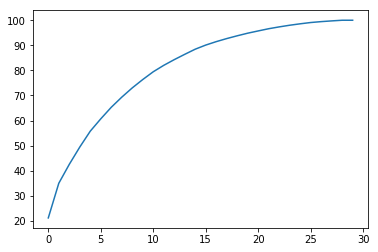

In [10]:
# Performing PCA for the factors
#convert it to numpy arrays( Not required)
A = factor.values

#Scaling the values(Not Required)
A = scale(A)

# Applyint PCA for the variables
factor_pca = PCA(n_components=30)

factor_pca.fit(A)

#The amount of variance that each PC explains
vari = factor_pca.explained_variance_ratio_

varit = factor_pca.fit_transform(A)

#Cumulative Variance explains
vari1 = np.cumsum(np.round(factor_pca.explained_variance_ratio_, decimals=4)*100)

print(vari1)

# to plot the variance graph
plt.plot(vari1)




In [11]:
# Column values of the dataframe after PCA
factor_comp = pd.DataFrame(factor_pca.components_)
factor_comp.columns

RangeIndex(start=0, stop=30, step=1)

In [12]:
# From the above graph we can conclude that we can consider 10 PC variables to cover 90% of variance
factor_pca = PCA(n_components=16)
factor_pca.fit(A)
Var=factor_pca.fit_transform(A)

# To assign the column names to the eigen values set
factor_final = pd.DataFrame(data=Var, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16',])
factor_final.columns
print (factor_final)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -4.504356  2.676168 -0.188981  0.971411  0.604219 -0.026723 -0.242948   
1   -2.432949 -2.140811  5.304218  2.910334 -0.156150  2.626188 -2.388326   
2   -0.374752 -0.641341 -1.825445 -0.363930  2.462253 -1.010838  0.774083   
3    0.850137 -0.686784 -0.597081  1.395263  0.309460 -1.130883  0.304068   
4   -4.515915  3.046458  0.100472  1.035881 -0.500927  0.917616  0.152060   
5    4.645361  2.650481 -0.886857 -0.568975 -0.022643 -2.758229  0.273116   
6    0.637658 -2.003442  4.939635  2.360477 -0.722305  1.343067 -1.735655   
7   -5.037443  3.295994  0.333290  0.830067 -0.061657 -0.983834 -0.274880   
8    4.370194  3.242140 -0.638001 -0.042729  0.096852 -2.679795 -0.480346   
9   -4.549746  3.272221  0.308413  1.078978 -0.336234  0.290352 -0.526254   
10   4.611530  2.876243 -0.678916 -0.525878  0.142050 -3.385493 -0.405199   
11  -5.014548  2.827040  0.158125  0.484940 -0.043786 -1.272012  0.436526   

In [13]:
# Create Gender Dataset 
Gender_data =pd.DataFrame()
Gender_data[['Gender', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['Gender', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Gender_data = pd.concat([Gender_data, factor_final], axis=1)


In [14]:
# Create Marital status Dataset 
Marital_data =pd.DataFrame()
Marital_data[['Marital status', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['Marital status', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Marital_data = pd.concat([Marital_data, factor_final], axis=1)


In [16]:
# Create Age Group Dataset 
Age_data =pd.DataFrame()
Age_data[['age group', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['age group', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Age_data = pd.concat([Age_data, factor_final], axis=1)


In [17]:
# Create Education Dataset 
Edu_data =pd.DataFrame()
Edu_data[['Educatuon', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['Educatuon', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Edu_data = pd.concat([Edu_data, factor_final], axis=1)


In [18]:
# Create Income Dataset 
Income_data =pd.DataFrame()
Income_data[['income', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['income', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Income_data = pd.concat([Income_data, factor_final], axis=1)


In [19]:
# Create Job Dataset 
Job_data =pd.DataFrame()
Job_data[['Job', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['Job', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Job_data = pd.concat([Job_data, factor_final], axis=1)


In [20]:
# Create Area Dataset 
Area_data =pd.DataFrame()
Area_data[['Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']] = pd.DataFrame(cust[['Area', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']])
Area_data = pd.concat([Area_data, factor_final], axis=1)


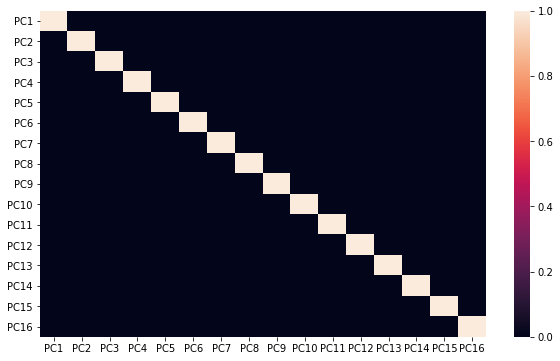

In [21]:
# Heat map of variables
plt.figure(figsize =(10,6))
#sns.heatmap(df_comp, cmap='plasma')
sns.heatmap(factor_final.corr())

In [22]:
#### Modelling for Gender Data

# spiltting the train and test Data
X = Gender_data[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'CBB_9', 'CBB_10', 'CBB_11', 'CBB_12', 'CBB_13', 'CBB_14']]
y = Gender_data['Gender']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

In [23]:
# Building a logistic regression model for Gender
Logistic_Gender = LogisticRegression()
Logistic_Gender.fit(X_train, y_train)

#The score function of sklearn can quickly assess the model performance.
Logistic_Gender.score(X_train, y_train)

0.6653543307086615

In [24]:
# Predictions and Evaluations
log_Gender_predictions = Logistic_Gender.predict(X_test)
print(classification_report(y_test, log_Gender_predictions))
print(confusion_matrix(y_test, log_Gender_predictions))


             precision    recall  f1-score   support

          0       0.69      0.43      0.53       113
          1       0.57      0.79      0.66       106

avg / total       0.63      0.61      0.59       219

[[49 64]
 [22 84]]


Kappa Score : 0.22334020618556705
Jaccard Score : 0.6073059360730594


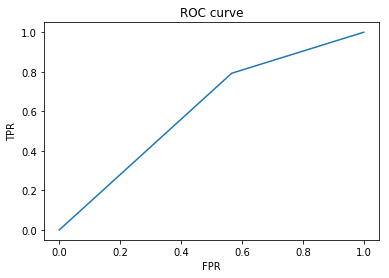

0.613040574386375

In [25]:
# Calculate Cohen kappa score and jaccard or accuracy score

print("Kappa Score :", cohen_kappa_score(y_test, log_Gender_predictions))

print("Jaccard Score :", jaccard_similarity_score(y_test, log_Gender_predictions))

# Calculate the ROC curve for logistic model
#Computing false and true positive rates

fpr, tpr, _ = roc_curve(y_test,log_Gender_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# To calculate the area under the ROC curve
auc(fpr,tpr)

roc_auc_score(y_test, log_Gender_predictions)

In [26]:
# Decision Tree for Gender Data
from sklearn import tree
Decision_Gender = tree.DecisionTreeClassifier()

Decision_Gender.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
# Predictions and Evaluations
Decision_Gender_predictions = Decision_Gender.predict(X_test)
print(classification_report(y_test, Decision_Gender_predictions))
print(confusion_matrix(y_test, Decision_Gender_predictions))

             precision    recall  f1-score   support

          0       0.65      0.55      0.59       113
          1       0.59      0.68      0.63       106

avg / total       0.62      0.61      0.61       219

[[62 51]
 [34 72]]


Kappa Score : 0.22679127725856696
Jaccard Score : 0.6118721461187214


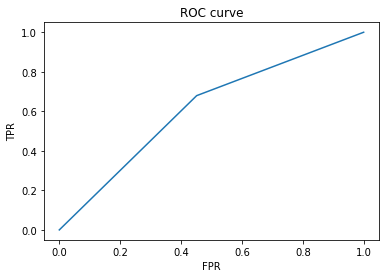

0.6139589246952746

In [28]:
# Calculate Cohen kappa score and jaccard or accuracy score

print("Kappa Score :", cohen_kappa_score(y_test, Decision_Gender_predictions))

print("Jaccard Score :", jaccard_similarity_score(y_test, Decision_Gender_predictions))

# Calculate the ROC curve for logistic model
#Computing false and true positive rates

fpr, tpr, _ = roc_curve(y_test,Decision_Gender_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# To calculate the area under the ROC curve
auc(fpr,tpr)

roc_auc_score(y_test, Decision_Gender_predictions)

In [29]:
# KNN Model for Gender Data
from sklearn.neighbors import KNeighborsClassifier  
KNN_Gender = KNeighborsClassifier(n_neighbors=5)  
KNN_Gender.fit(X_train, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
# Predictions and Evaluations
KNN_Gender_predictions = KNN_Gender.predict(X_test)
print(classification_report(y_test, KNN_Gender_predictions))
print(confusion_matrix(y_test, KNN_Gender_predictions)) 

             precision    recall  f1-score   support

          0       0.61      0.52      0.56       113
          1       0.56      0.64      0.60       106

avg / total       0.58      0.58      0.58       219

[[59 54]
 [38 68]]


Kappa Score : 0.16287186305467838
Jaccard Score : 0.5799086757990868


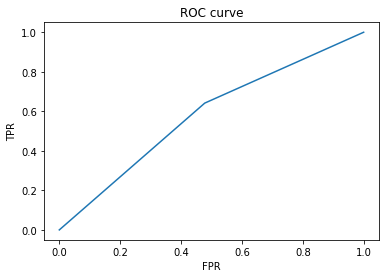

0.5818166638837868

In [31]:
# Calculate Cohen kappa score and jaccard or accuracy score

print("Kappa Score :", cohen_kappa_score(y_test, KNN_Gender_predictions))

print("Jaccard Score :", jaccard_similarity_score(y_test, KNN_Gender_predictions))

# Calculate the ROC curve for logistic model
#Computing false and true positive rates

fpr, tpr, _ = roc_curve(y_test,KNN_Gender_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# To calculate the area under the ROC curve
auc(fpr,tpr)

roc_auc_score(y_test, KNN_Gender_predictions)

In [32]:
# Naive Bayes for Gender Data
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
Naive_Gender = GaussianNB()
multiNaive = MultinomialNB()
Naive_Gender.fit(X_train, y_train)

GaussianNB(priors=None)

In [33]:
# Predictions and Evaluations
Naive_Gender_predictions = Naive_Gender.predict(X_test)
print(classification_report(y_test, Naive_Gender_predictions))
print(confusion_matrix(y_test, Naive_Gender_predictions)) 

             precision    recall  f1-score   support

          0       0.73      0.42      0.54       113
          1       0.58      0.83      0.68       106

avg / total       0.65      0.62      0.61       219

[[48 65]
 [18 88]]


Kappa Score : 0.25151327980234717
Jaccard Score : 0.6210045662100456


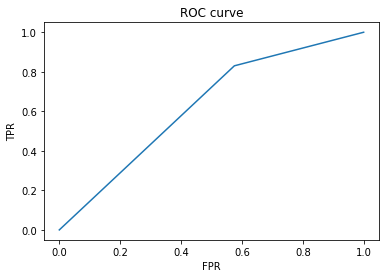

0.627483720153615

In [34]:
# Calculate Cohen kappa score and jaccard or accuracy score

print("Kappa Score :", cohen_kappa_score(y_test, Naive_Gender_predictions))

print("Jaccard Score :", jaccard_similarity_score(y_test, Naive_Gender_predictions))

# Calculate the ROC curve for logistic model
#Computing false and true positive rates

fpr, tpr, _ = roc_curve(y_test,Naive_Gender_predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# To calculate the area under the ROC curve
auc(fpr,tpr)

roc_auc_score(y_test, Naive_Gender_predictions)